# Oliver Medgyesi

## Research question/interests

I am mainly interested in resarching the average salary of an individual, more specifically kelowna residents, and how affordable the current housing market is. I will also determine what factors are most significant in impacting the price of housing and how we can attempt to lower them. Columns 48, 52, and 54 from our dataset will be used to analyze my resarch question.

### My Primary Question:

1. **How does the affordability of housing in Canada vary relative to the average monthly net salary, and what factors such as population density, location and demand may be driving or affecting these discrepancies. Also, how does Kelowna compare in terms of housing prices compared to other cities in Canada.**

> To answer this question, I am going to analyze the data on the average monthly net saraly and the cost of apartments in various canadian locations. I will then calculate the average cost of housing as a percentage of the average salary in each location. I will also focus on the considerable changes in the affordability of housing in Kelowna. I will also explore the potential factors that possibly contribute to these differences.
---
### Supporting Questions Regarding Housing Affordability and the Average Salary:


2. **Is there a correlation between the price of housing and the cost of living and is it impacted by outside factors such as population and density?**
 
 > To answer this question, we will need to find if there is a correlation between the price of housing and the cost of living. We can use regression to examine the relationships between housing prcies and the multiple factors listed. By anaylyzing this way, we will be able to determine if there is any relationship bonded from these categories. If so, we will determine which factor has the greatest impact on the price of housing. 

3. **What percentage of the average salary in Kelowna is required to afford the current housing prices and how has this changed overtime?**

 > I am going to focus on examining the trends over time to determine if there is any correlation between the changes in kelowna residents average salary and the changes in housing affordability. By examining this data over different intervals of time, I will find if there are any significant changes or fluxuations in the housing market.




---


### Data dictionary
| Column | Description |
| - | - |
| city | Name of the city |
| country | Name of the country|
| x1 | Meal, Inexpensive Restaurant (USD) |
| x2 | Meal for 2 People, Mid-range Restaurant, Three-course (USD) |
| x3 | McMeal at Mcdonalds (or Equivalent Combo Meal) (USD) |
| x4 | Domestic Beer (0.5 litre draught, in restaurants) (USD) |
| x5 | Imported Beer (0.33 litre bottle, in restaurants) (USD) |
| x6 | Cappuccino (regular, in restaurants) (USD) |
| x7 | Coke/Pepsi (0.33 litre bottle, in restaurants) (USD) |
| x8 | Water (0.33 litre bottle, in restaurants) (USD) |
| x9 | Milk (regular), (1 litre) (USD) |
| x10 | Loaf of Fresh White Bread (500 g) (USD) |
| x11 | Rice (white), (1kg) (USD) |
| x12 | Eggs (regular) (12) (USD) |
| x13 | Local Cheese (1kg) (USD) |
| x14 | Chicken Fillets (1kg) (USD) |
| x15 | Beef Round (1kg) (or Equivalent Back Leg Red Meat) (USD) |
| x16 | Apples (1kg) (USD) |
| x17 | Bananas (1kg) (USD) |
| x18 | Oranges (1kg) (USD) |
| x19 | Tomatoes (1kg) (USD) |
| x20 | Potatoes (1kg) (USD) |
| x21 | Onions (1kg) (USD) |
| x22 | Lettuce (1 head) (USD) |
| x23 | Water (1.5 litre bottle, at the market) (USD) |
| x24 | Bottle of Wine (Mid-Range, at the market) (USD) |
| x25 | Domestic Beer (0.5 litre bottle, at the market) (USD) |
| x26 | Imported Beer (0.33 litre bottle, at the market) (USD) |
| x27 | Cigarettes 20 Pack (Marlboro) (USD) |
| x28 | One-way Ticket (Local Transport) (USD) |
| x29 | Monthly Pass (Regular Price) (USD) |
| x30 | Taxi Start (Normal Tariff) (USD) |
| x31 | Taxi 1km (Normal Tariff) (USD) |
| x32 | Taxi 1hour Waiting (Normal Tariff) (USD) |
| x33 | Gasoline (1 litre) (USD) |
| x34 | Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car) (USD) |
| x35 | Toyota Corlla Sedan 1.6l 97kW Comfort (Or Equivalent New Car) (USD) |
| x36 | Basic (Electricity, Heating, Cooling, Water, Garbage) for 85 m<sup>2</sup> Apartment (USD) |
| x37 | 1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans) (USD) |
| x38 | Internet (60 Mbps or More, Unlimited Data, Cable/ADSL) (USD) |
| x39 | Fitness Club, Monthly Fee for 1 Adult (USD) |
| x40 | Tennis Court Rent (1 Hour on Weekend) (USD) |
| x41 | Cinema, International Release, 1 Seat (USD) |
| x42 | Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child (USD) |
| x43 | International Primary School, Yearly for 1 Child (USD) |
| x44 | 1 Pair of Jeans (Levis 501 Or Similar) (USD) |
| x45 | 1 Summer Dress in a Chain Store (Zara, H&M, or similar) (USD) |
| x46 | 1 Pair of Nike Running Shoes (Mid-Range) (USD) |
| x47 | 1 Pair of Men Leather Business Shoes (USD) |
| x48 | Apartment (1 bedroom) in City Centre (USD) |
| x49 | Apartment (1 bedroom) Outside of Centre (USD) |
| x50 | Apartment (3 bedrooms) in City Centre (USD) |
| x51 | Apartment (3 bedrooms) Outside of Centre (USD) |
| x52 | Price per Square Metre to Buy Apartment in City Centre (USD) |
| x53 | Price per Square Metre to Buy Apartment Outside of Centre (USD) |
| x54 | Average Monthly Net Salary (After Tax) (USD) |
| x55 | Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate
| data_quality | 0 if Numbeo considers that more contributors are needed to increase data quality, else 1 |

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load data
cost_living_df = pd.read_csv("../data/raw/cost-of-living_v2.csv")
cost_living_df.head()

In [ ]:
cost_living_df[cost_living_df['city']=='Kelowna']

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px

#base
sns.set_theme(style="ticks", font_scale=1.3)
plt.rc("axes.spines", top=False, right=False)
sns.set(rc={'figure.figsize':(5,8)})

In [52]:
#load data
df = pd.read_csv("../data/processed/cost-of-living-RENAMED.csv")
df.head()

,city,country,x1 (meal cheap),x2 (meal mid-range),x3 (McMeal),x4 (beer domestic),x5 (beer imported),x6 (cappuccino),x7 (Coke/Pepsi),x8 (water resto),...,x47 (men's business shoes),x48 (apartment 1BR city center),x49 (apartment 1BR outside center),x50 (apartment 3BR city center),x51 (apartment 3BR outside center),x52 (price per sqm city center),x53 (price per sqm outside center),x54 (average monthly net salary),x55 (mortgage interest rate),data_quality
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,110.36,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,123.51,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,43.89,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,41.17,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,36.50,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1


In [21]:
kelowna_df = df[df['city'] == 'Kelowna']
kelowna_df

,city,country,x1 (meal cheap),x2 (meal mid-range),x3 (McMeal),x4 (beer domestic),x5 (beer imported),x6 (cappuccino),x7 (Coke/Pepsi),x8 (water resto),...,x47 (men's business shoes),x48 (apartment 1BR city center),x49 (apartment 1BR outside center),x50 (apartment 3BR city center),x51 (apartment 3BR outside center),x52 (price per sqm city center),x53 (price per sqm outside center),x54 (average monthly net salary),x55 (mortgage interest rate),data_quality
2110,Kelowna,Canada,11.12,61.14,8.89,5.19,5.19,3.71,1.76,1.67,...,91.25,1301.03,1079.54,2206.98,1804.14,3875.6,2910.15,3119.7,6.01,1


# Exploring the Dataset

Here is a list of some ways to explore the dataset:

1. We can use the head() function to get the first few rows of our dataset. It is hard to interperate these column names, so lets rename all the columns to their corresponding values.

2. The info() method can be used to gather a summary of the dataset which includes, columns, data types, and NaN values.

3. We can use the shape function to get the size of the dataset.

4. We can use the describe function to describe to get a summary of each individual column in the dataset.

5. Lets calculate the total number of NaN Values inside of the dataset, then create a column that calculates each specific amount of NaN values. I also want to see which columns contain more than 3 NaN values. This is because anything with more than 3 is considered to be bad quality data and cannot be included in our research. 

6. We can visualize the greatest to least amount of NaN values inside of the dataset and then we can remove them.

In [ ]:
df.info()

In [23]:
df.shape

(4956, 58)

In [ ]:
df.describe

In [43]:
df = df[['city', 'country', 
    #'x1', 'x2', 
    'x3 (McMeal)', #McDonalds
    #'x4', 'x5', 'x6', 'x7', 'x8',
    'x9 (milk)','x10 (bread)', 'x11 (rice)', 'x12 (eggs)', 'x13 (cheese local)',
    'x14 (chicken fillets)', 'x15 (beef round)', 'x16 (apples)',
    'x17 (bananas)', 'x18 (oranges)', 'x19 (tomatoes)', 'x20 (potatoes)',
    'x21 (onions)', 'x22 (lettuce)', 'x23 (water 1.5L)', #Groceries
    #'x24', 'x25', 'x26', 'x27', 
    'x28 (One-Way ticket transit)', 'x29 (monthly pass transit)',
    'x30 (taxi start)', 'x31 (taxi 1km)', 'x32 (Taxi 1hr wait)',
    'x33 (Gas 1L)', 
    "x34 (Volkswagen Golf)", "x35 (Toyota Corolla Sedan)",  # Transport
    'x36 (basic utilities)', #Basic
    #'x37','x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 
    'x48 (apartment 1BR city center)',
    'x49 (apartment 1BR outside center)', 'x50 (apartment 3BR city center)',
    'x51 (apartment 3BR outside center)', 'x52 (price per sqm city center)',
    'x53 (price per sqm outside center)',#Shelter
    'x54 (average monthly net salary)', #Monthly net salary (after tax)
    'x55 (mortgage interest rate)', 
    'data_quality']].copy()

In [ ]:
total_nans = df.isna().sum().sum()
print(f'Total number of NaN values: {total_nans}')

df['Num_NaN'] = df.isnull().sum(axis=1)
df


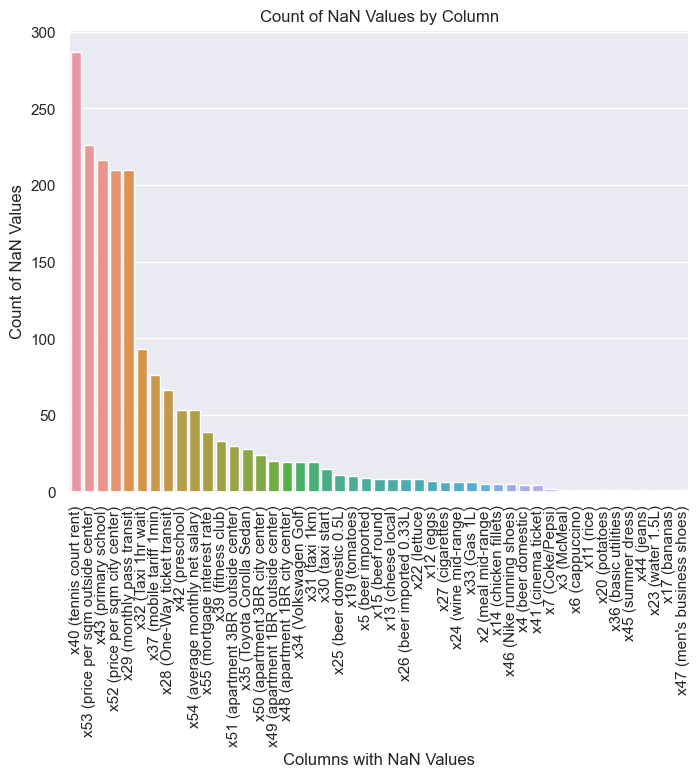

In [26]:
mask = df.isna().sum(axis=1) <= 3
cost_living_clean = df[mask]
nan_cols = cost_living_clean.isna().any()
nan_cols = nan_cols[nan_cols].index.tolist()

nan_counts = cost_living_clean[nan_cols].isna().sum().sort_values(ascending=False)

sns.set_palette("pastel")

nan_counts = cost_living_clean.isna().sum()
nan_counts = nan_counts[nan_counts > 0]
nan_counts = nan_counts.sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=nan_counts.index, y=nan_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Columns with NaN Values")
plt.ylabel("Count of NaN Values")
plt.title("Count of NaN Values by Column")
plt.show()

# Cleaning the Dataset

Here are some ways we can clean our dataset:

1. First we can handle any dupliactes that appear in our dataset by using the drop_duplicates() method.

2. We can use the isnull() method to identify any null or NaN values inside of the dataset. Then, we can use the dropna() method to get rid of them.,

3. We can determine if there are any inconsistencies inside of our dataset. If there are any inconsistencies, then we will remove them from the dataset.

4. We can also remove any outliers inside of the specific columns we are going to use. For example we can remove any outliers inside of the "Avery Monthly New Salary" section of the Kelowna column. Removing outliers from this section of data is important because it something that I will be using to create coorelations with other parts of our dataset.

5. Drop all bad quality data from the dataset.

In [27]:
df = df.drop_duplicates()

In [ ]:
df.isnull
df.dropna

In [ ]:
inconsistent_data = cost_living_df.apply(lambda x: len(x.unique()) == 1)
cost_living_df = cost_living_df.loc[:, ~inconsistent_data]
inconsistent_data


In [39]:
def remove_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    df = df[~((df< (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]
    return df

In [40]:
df.drop(df[df['data_quality'] == 0].index, inplace=True)
df.isna().sum().sort_values(ascending=False).head(10)
df.shape

(923, 59)

# Visualizing some of our Data

First we can create a heatmap to see which factors have a significant correlation.



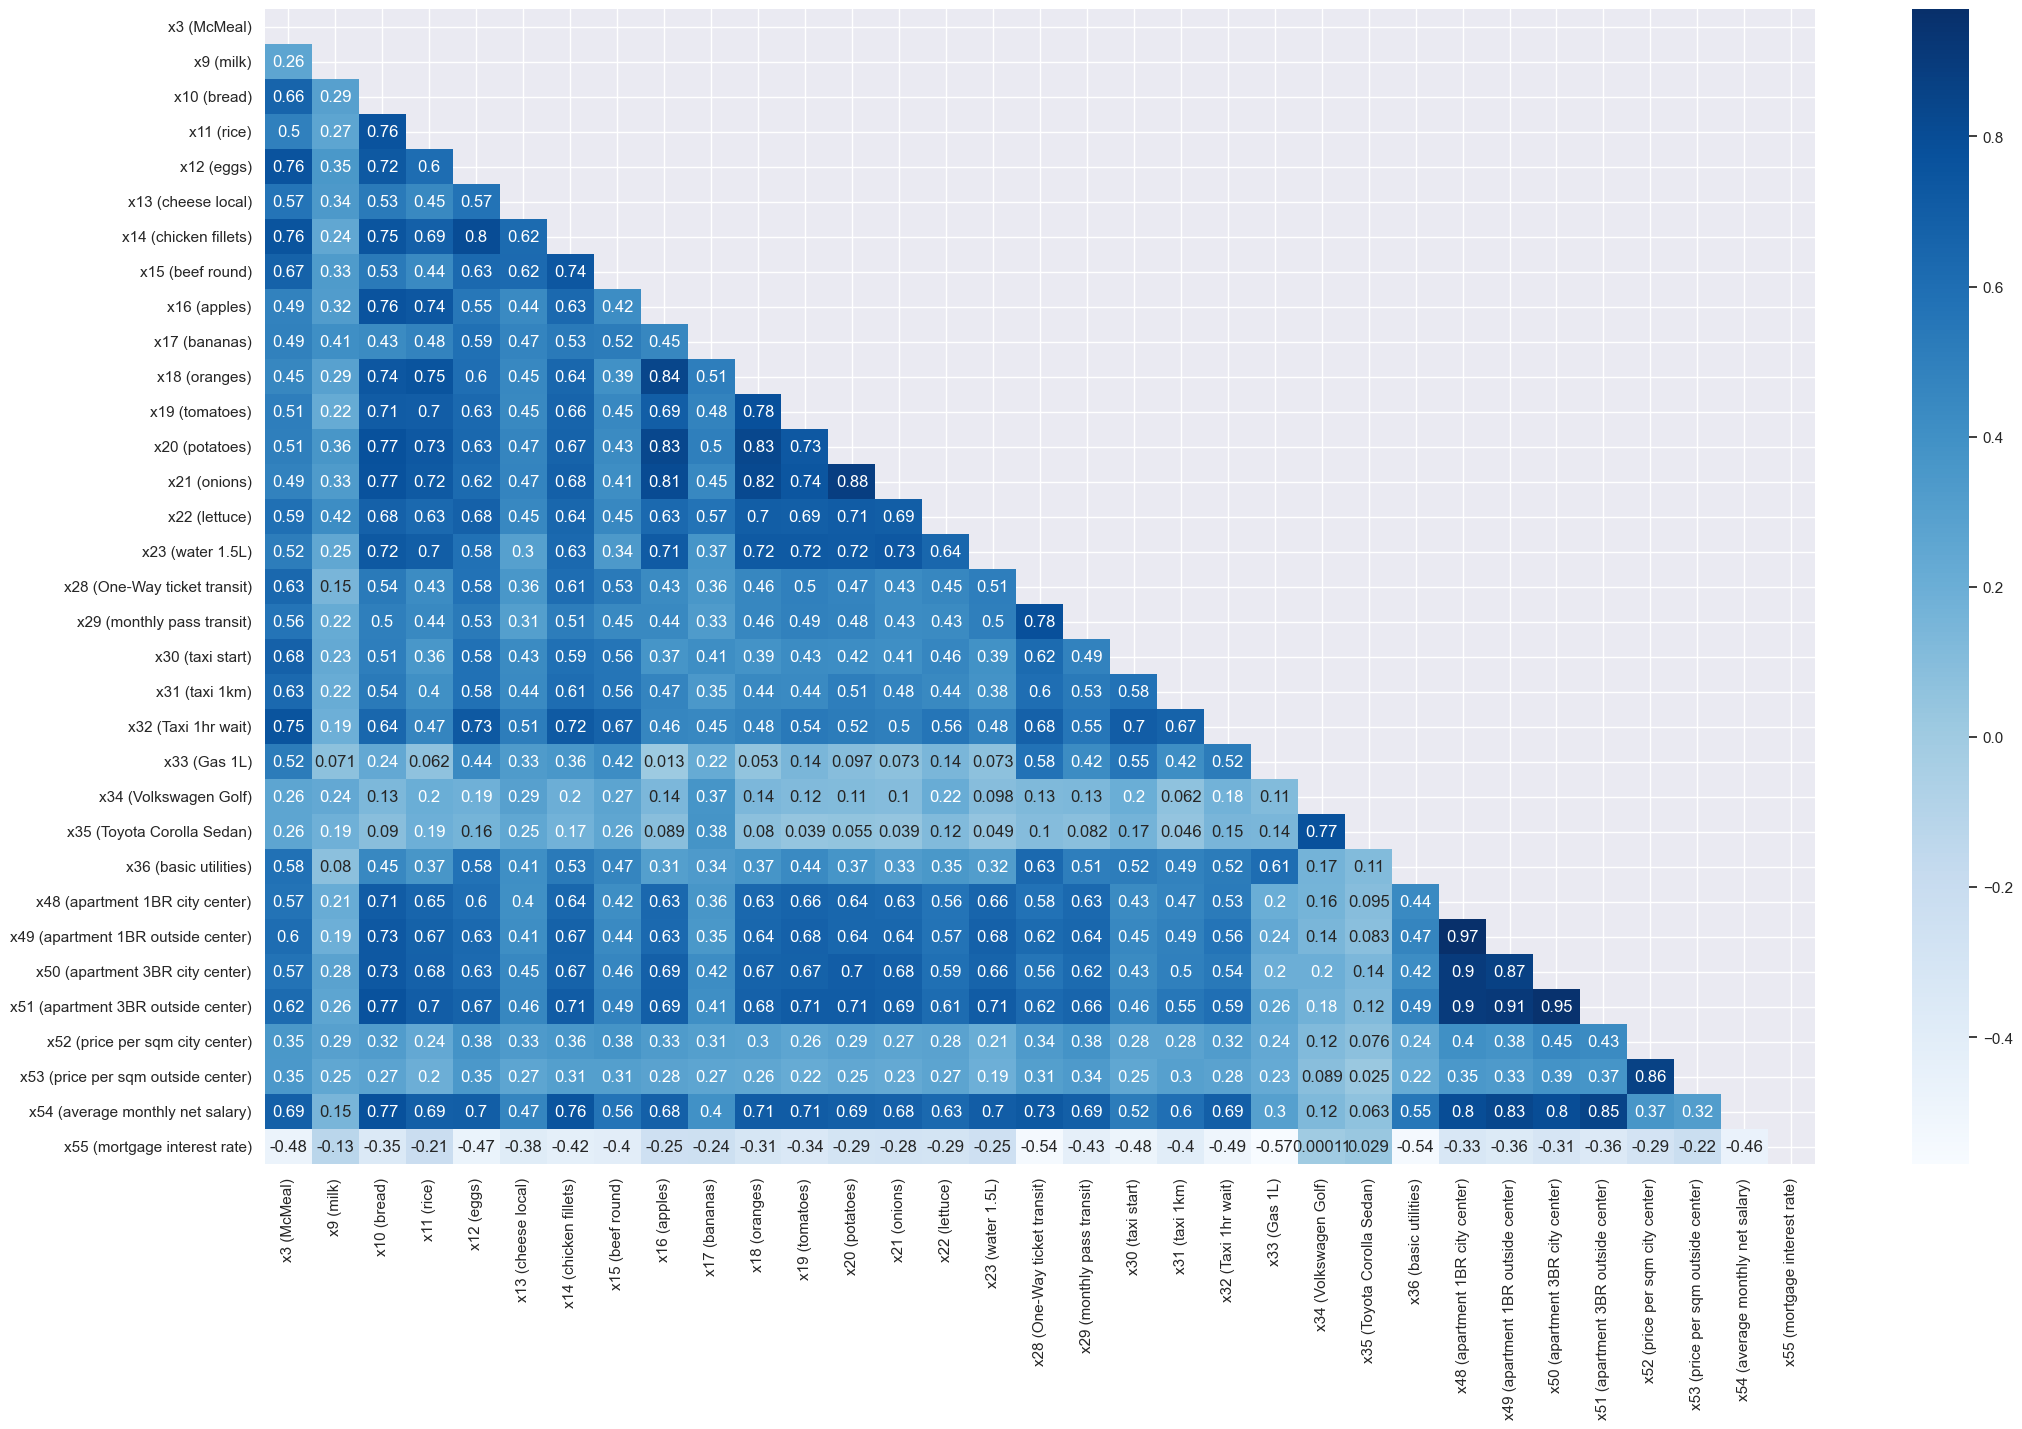

In [47]:
plt.figure(figsize=(25,15))
df_filtered = df.drop(columns=["data_quality","Num_NaN"])
corr = df_filtered.corr(numeric_only = True,)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues',mask=mask)
plt.show()

Now that we can visually see all the possible correlations, lets investigate some possible positive and negative correlations. 

Strongest Correlation: Apartment 1BR Outside City Center and Apartment 1BR Inside City Center (0.97)

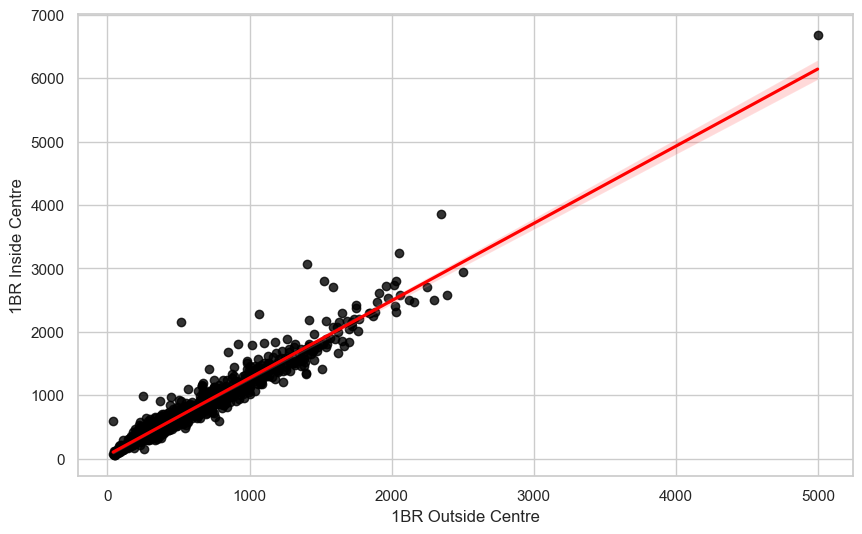

In [48]:
sns.set_style("whitegrid")

x = df["x49 (apartment 1BR outside center)"]
y = df["x48 (apartment 1BR city center)"]

plt.figure(figsize=(10, 6))
sns.regplot(x=x, y=y, color="black", line_kws={"color": "red"})
plt.xlabel("1BR Outside Centre")
plt.ylabel("1BR Inside Centre")

plt.show()

As we can see there is a 0.97 correlation between the two. The reason for this may be that there is a strong demand for housing outside of the centre and inside the city. Another reason for this correlation would be the location. City centers tend to have ammenties making them more expensive which would create a correlation.

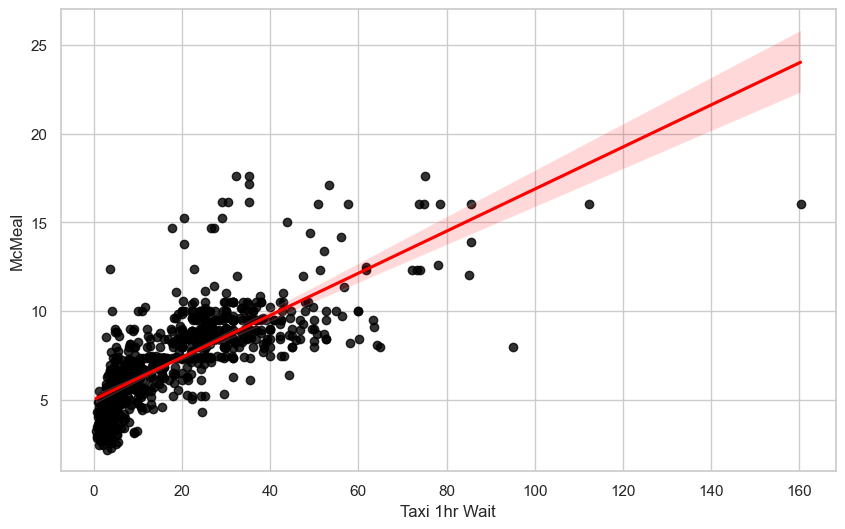

In [50]:
sns.set_style("whitegrid")

x = df["x32 (Taxi 1hr wait)"]
y = df["x3 (McMeal)"]

plt.figure(figsize=(10, 6))
sns.regplot(x=x, y=y, color="black", line_kws={"color": "red"})
plt.xlabel("Taxi 1hr Wait")
plt.ylabel("McMeal")

plt.show()

Another strong correlation is between a taxi wait time and a McMeal. This correlation could be cause by indivuals who tend to purchase fast-food while waiting for a taxi.

# Adjusting to Canada

In this section i will be creating a "Canada" dataframe that contains all of the cities in Canada. This way it is a lot easier to compare the housing prices in Kelowna to other cities. Now we need to see which cities contain more than 3 NaN values in order to filter our data.

In [53]:
canada_df = df[df["country"] == "Canada"]

canada_housing_df = canada_df[['city', "x48 (apartment 1BR city center)", "x49 (apartment 1BR outside center)", "x50 (apartment 3BR city center)", "x51 (apartment 3BR outside center)",
            "x52 (price per sqm city center)",  "x53 (price per sqm outside center)", "x54 (average monthly net salary)", "x55 (mortgage interest rate)",]]

canada_housing_df

,city,x48 (apartment 1BR city center),x49 (apartment 1BR outside center),x50 (apartment 3BR city center),x51 (apartment 3BR outside center),x52 (price per sqm city center),x53 (price per sqm outside center),x54 (average monthly net salary),x55 (mortgage interest rate)
102,Toronto,1728.50,1426.71,2733.40,2302.11,9834.67,7249.17,3249.79,5.24
151,Montreal,1045.58,800.16,1846.59,1342.69,6069.66,3487.84,2823.94,5.41
209,Vancouver,1799.96,1502.80,3373.09,2341.43,9983.22,7902.75,3474.89,4.46
355,Calgary,1121.71,903.12,1976.24,1504.96,3328.49,2651.05,3807.94,4.58
410,Edmonton,906.92,745.74,1535.36,1153.16,2200.36,1841.51,3403.02,4.82
...,...,...,...,...,...,...,...,...,...
4904,Peace River,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.47
4911,Parry Sound,815.26,741.15,993.05,NaN,NaN,NaN,NaN,NaN
4934,La Ronge,592.92,592.92,741.15,741.15,NaN,NaN,NaN,2.64
4942,Flin Flon,NaN,589.21,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
city_counts = canada_housing_df.groupby("city").apply(lambda x: x.isna().sum().sum())
bad_cities = city_counts[city_counts >= 3].index.tolist()

canada_housing_df = canada_housing_df[~canada_housing_df["city"].isin(bad_cities)]
canada_housing_df.reset_index(drop=True)

canada_housing_df


,city,x48 (apartment 1BR city center),x49 (apartment 1BR outside center),x50 (apartment 3BR city center),x51 (apartment 3BR outside center),x52 (price per sqm city center),x53 (price per sqm outside center),x54 (average monthly net salary),x55 (mortgage interest rate)
102,Toronto,1728.50,1426.71,2733.40,2302.11,9834.67,7249.17,3249.79,5.24
151,Montreal,1045.58,800.16,1846.59,1342.69,6069.66,3487.84,2823.94,5.41
209,Vancouver,1799.96,1502.80,3373.09,2341.43,9983.22,7902.75,3474.89,4.46
355,Calgary,1121.71,903.12,1976.24,1504.96,3328.49,2651.05,3807.94,4.58
410,Edmonton,906.92,745.74,1535.36,1153.16,2200.36,1841.51,3403.02,4.82
...,...,...,...,...,...,...,...,...,...
4725,Canmore,1420.54,1309.36,2408.74,2371.68,4987.32,NaN,1778.76,7.00
4751,Powell River,926.44,926.44,1408.18,1383.48,3988.83,3191.07,2816.37,6.25
4773,Whistler,1982.58,1630.53,3798.39,2871.96,NaN,NaN,1334.07,6.03
4878,Castlegar,1278.48,982.02,1408.18,1482.30,NaN,NaN,3186.94,3.40


Lets compare the price per square meter outside the city of Kelowna to Vancouver, Calgary, and Winnpeg.

In [55]:
cities = ["Kelowna", "Vancouver", "Calgary", "Winnipeg"]
df_cities = canada_housing_df[canada_housing_df['city'].isin(cities)]
df_kelowna = df_cities[df_cities['city'] == 'Kelowna']
df_vancouver = df_cities[df_cities['city'] == 'Vancouver']
df_winnipeg = df_cities[df_cities['city'] == 'Winnipeg']
df_calgary = df_cities[df_cities['city'] == 'Calgary']


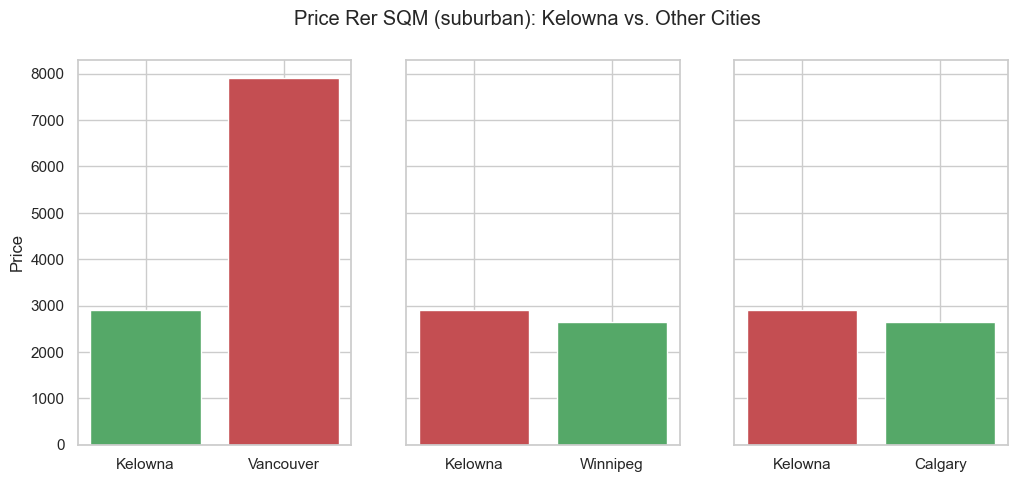

In [56]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True)

# Setting Colors
kelowna_vancouver_color = 'g' if df_kelowna['x53 (price per sqm outside center)'].values[0] < df_vancouver['x53 (price per sqm outside center)'].values[0] else 'r'
kelowna_winnipeg_color = 'g' if df_kelowna['x53 (price per sqm outside center)'].values[0] < df_winnipeg['x53 (price per sqm outside center)'].values[0] else 'r'
kelowna_calgary_color = 'g' if df_kelowna['x53 (price per sqm outside center)'].values[0] < df_calgary['x53 (price per sqm outside center)'].values[0] else 'r'

# Kelowna vs Vancouver
axs[0].bar(x=[0, 1], height=[df_kelowna['x53 (price per sqm outside center)'].values[0],
                             df_vancouver['x53 (price per sqm outside center)'].values[0]],
           color=[kelowna_vancouver_color, 'r'])
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Kelowna', 'Vancouver'])
axs[0].set_ylabel('Price')

# Kelowna vs Winnipeg
axs[1].bar(x=[0, 1], height=[df_kelowna['x53 (price per sqm outside center)'].values[0],
                             df_winnipeg['x53 (price per sqm outside center)'].values[0]],
           color=[kelowna_winnipeg_color, 'g'])
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Kelowna', 'Winnipeg'])

# Kelowna vs Calgary
axs[2].bar(x=[0, 1], height=[df_kelowna['x53 (price per sqm outside center)'].values[0],
                             df_calgary['x53 (price per sqm outside center)'].values[0]],
           color=[kelowna_calgary_color, 'g'])
axs[2].set_xticks([0, 1])
axs[2].set_xticklabels(['Kelowna', 'Calgary'])

plt.suptitle('Price Rer SQM (suburban): Kelowna vs. Other Cities')
plt.show()

In this visualization, the cities that are colored in green indicate that is is cheaper than its adversary (red).

# Extra statistics

First, I am going to create a new dataframe that contains the Mean, Median, STD, Min, and Max values for all of Canada.

In [ ]:

mean = canada_housing_df.mean()
median = canada_housing_df.median()
std = canada_housing_df.std()
minimum = canada_housing_df.min()
maximum = canada_housing_df.max()

stats_df = pd.concat([mean, median, std, minimum, maximum], axis=1)
stats_df.columns = ['Mean', 'Median', 'Std', 'Min', 'Max']

stats_df

From creating this new dataframe, we can see that Abbotsford has some of the lowest statistics, while Yellowknife is on the opposite end. Due to Yellowstone being so remote, the cost of living and housing is more expensive than in other places. This also indicates why the average monthly net salary is much more as necessities are more expensive due to their scarcity.

Lets visualize the Min vs Max values of "stats_df" which contains the most expensive housing vs the least expensive.

<Axes: >

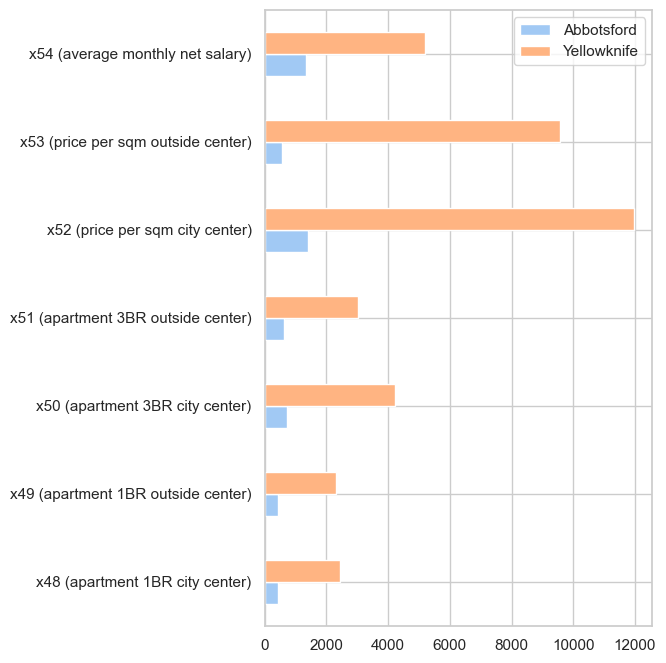

In [58]:
min_df = stats_df['Min']
max_df = stats_df['Max']
new_labels = {'Min': 'Abbotsford', 'Max': 'Yellowknife'}

minmax_df = pd.DataFrame(stats_df,columns = ['Min','Max'], index = ['x48 (apartment 1BR city center)','x49 (apartment 1BR outside center)','x50 (apartment 3BR city center)','x51 (apartment 3BR outside center)','x52 (price per sqm city center)','x53 (price per sqm outside center)','x54 (average monthly net salary)'])
minmax_df = minmax_df.rename(columns=new_labels)
minmax_df.plot.barh()

Now we need to import the new dataset containing Canadian cities, their corresponding asci codes, id, province name, longitude and latitude, population, timnezone, ranking, postal, and id.

Here are the columns I will  be keeping: lat, long, population, density, and city.

In [59]:
canadapop_df = pd.read_csv("../data/raw/canadacities.csv")
canpop_df  = canadapop_df.drop(['timezone','postal','id','city_ascii','province_id','province_name','ranking'], axis = 1)

canpop_df 

,city,lat,lng,population,density
0,Toronto,43.7417,-79.3733,5429524.0,4334.4
1,Montréal,45.5089,-73.5617,3519595.0,3889.0
2,Vancouver,49.2500,-123.1000,2264823.0,5492.6
3,Calgary,51.0500,-114.0667,1239220.0,1501.1
4,Edmonton,53.5344,-113.4903,1062643.0,1360.9
...,...,...,...,...,...
1733,Durham-Sud,45.6667,-72.3333,1008.0,10.8
1734,Melbourne,45.5800,-72.1700,1004.0,5.8
1735,Nipawin No. 487,53.2881,-104.0544,1004.0,1.1
1736,Duck Lake No. 463,52.9596,-106.2089,1004.0,1.0


Now I want to merge the canada_housing_df with the city_df that contains all of our population data. For the sake of consistency, I am renaming all of the columns to pair with our new merged data.

In [60]:
canada_df = pd.merge(canada_housing_df,canpop_df)

canada_df = (canada_df
             .rename(columns={'x48 (apartment 1BR city center)': 'apartment 1BR city center', 'x49 (apartment 1BR outside center)': 'apartment 1BR outside center', 
                              'x50 (apartment 3BR city center)': 'apartment 3BR city center', 'x51 (apartment 3BR outside center)': 'apartment 3BR outside center',
                              'x52 (price per sqm city center)': 'price per sqm city center', 'x53 (price per sqm outside center)': 'price per sqm outside center', 
                              'x54 (average monthly net salary)': 'average monthly net salary', 'x55 (mortgage interest rate)': 'mortgage interest rate'})
             
             .assign(price_per_sqm = lambda x: x[['price per sqm city center', 'price per sqm outside center']].mean(axis=1))
             .assign(affordability_ratio = lambda x: x[['apartment 1BR city center', 'apartment 1BR outside center', 'apartment 3BR city center', 
                                                        'apartment 3BR outside center','price per sqm city center','price per sqm outside center']].sum(axis=1) / x['average monthly net salary'])
             
             .rename(columns={'price_per_sqm': 'price per sqm', 'affordability_ratio':'affordability ratio'})
             .sort_values(by=['affordability ratio'], ascending=False)
             .dropna()
)

canada_df

,city,apartment 1BR city center,apartment 1BR outside center,apartment 3BR city center,apartment 3BR outside center,price per sqm city center,price per sqm outside center,average monthly net salary,mortgage interest rate,lat,lng,population,density,price per sqm,affordability ratio
18,Markham,1500.83,1315.54,2421.09,2223.45,11168.74,9573.20,3186.84,6.00,43.8767,-79.2633,328966.0,1549.2,10370.970,8.849785
33,Barrie,1375.76,1232.16,1964.05,1951.69,11966.50,9573.20,3335.17,6.94,44.3711,-79.6769,172657.0,1428.0,10769.850,8.414372
0,Toronto,1728.50,1426.71,2733.40,2302.11,9834.67,7249.17,3249.79,5.24,43.7417,-79.3733,5429524.0,4334.4,8541.920,7.777290
1,Vancouver,1799.96,1502.80,3373.09,2341.43,9983.22,7902.75,3474.89,4.46,49.2500,-123.1000,2264823.0,5492.6,8942.985,7.742188
29,Richmond,1411.89,1507.00,3816.92,2594.02,9573.20,7778.23,3740.95,5.60,45.6667,-72.1500,3232.0,460.2,8675.715,7.132215
30,Richmond,1411.89,1507.00,3816.92,2594.02,9573.20,7778.23,3740.95,5.60,46.0776,-67.7248,1303.0,5.0,8675.715,7.132215
28,Richmond,1411.89,1507.00,3816.92,2594.02,9573.20,7778.23,3740.95,5.60,49.1667,-123.1333,198309.0,1534.1,8675.715,7.132215
26,Burnaby,1556.41,1452.65,3302.81,2198.74,6781.02,6781.02,3460.62,7.40,49.2667,-122.9667,232755.0,2568.7,6781.020,6.378236
37,Abbotsford,1259.95,1074.67,2841.07,2025.81,4446.90,5107.76,2643.43,6.83,49.0500,-122.3167,141397.0,376.5,4777.330,6.338795
48,Kamloops,1089.49,984.08,1931.62,1623.12,5976.37,5434.08,2841.07,5.76,50.6761,-120.3408,100046.0,301.7,5705.225,5.997304


Here we are creating an affordability ratio column to get an idea of how affordable housing is in different areas of Canada. Generally, an affordability ratio of %30 or less is considered to be affordable, whilst anything above is considered as expensive.

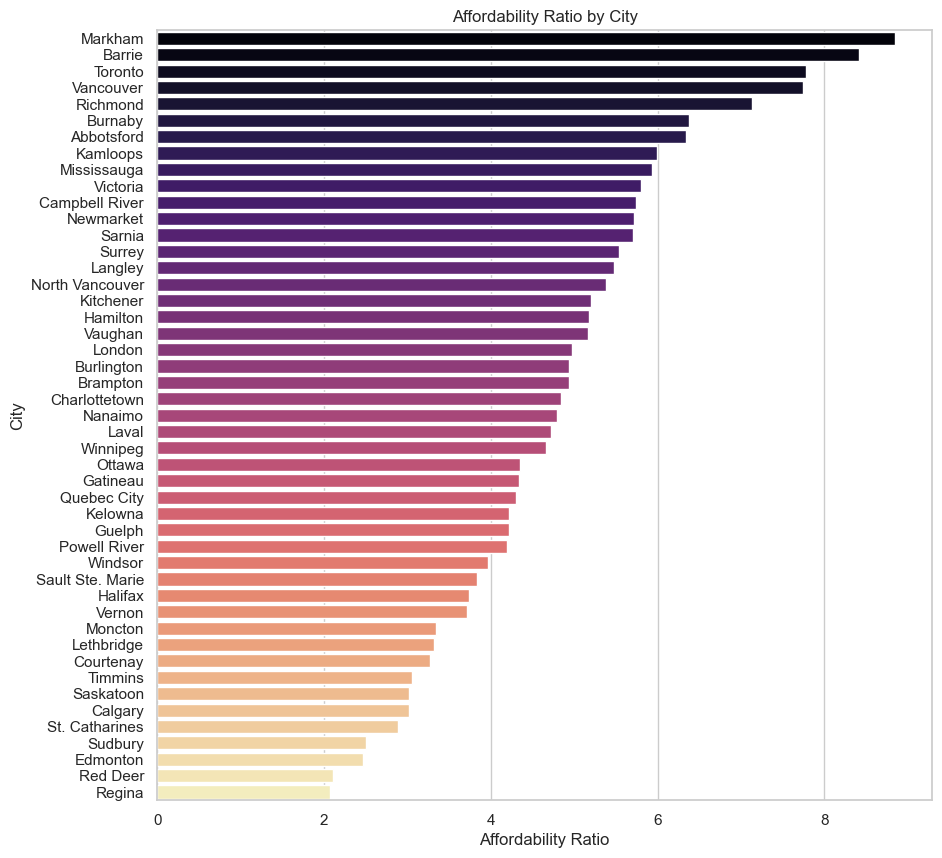

In [61]:

fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(x='affordability ratio', y='city', data=canada_df, palette = 'magma')

ax.set_title('Affordability Ratio by City')
ax.set_xlabel('Affordability Ratio')
ax.set_ylabel('City')

plt.show()

Lets create a visualization to determine which cities are considered affordable versus expensive. I am going to do this by using the folium extension to plot each city in our dataframe. As in the previous examples i've used, green indicates that a city is considered "affordable" and red is considered "expensive". This plot is based on the "price per sqm city centre" and affordable is < $4000 whilst red is > $4000.

In [62]:
import folium
import pandas as pd

map = folium.Map(location=[canada_df.iloc[0]['lat'], canada_df.iloc[0]['lng']], zoom_start=5)

for index, row in canada_df.iterrows():
    ratio = row['affordability ratio']
    if ratio > 3.0:
        color = 'red'
    else:
        color = 'green'
    folium.Marker([row['lat'], row['lng']], popup=row['city'], icon=folium.Icon(color=color)).add_to(map)

map

As we can see, the majority of cities in Canada are considered to be expensive. To be exact, lets calculate the amount of cities that are "expensive" versus "affordable"

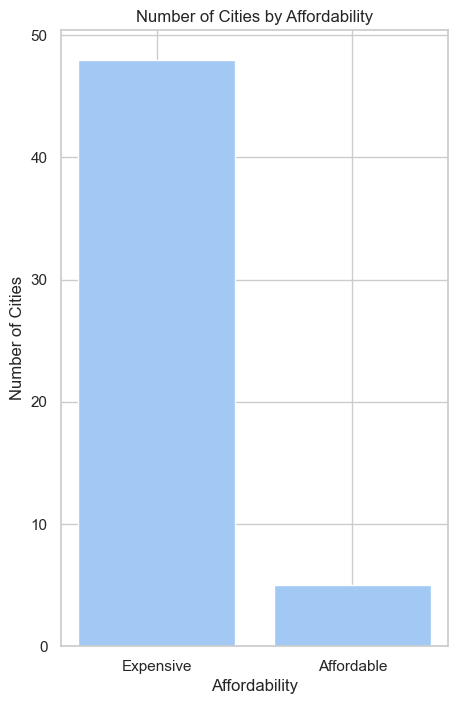

In [63]:
expensive_count = (canada_df['affordability ratio'] > 3.0).sum()
affordable_count = (canada_df['affordability ratio'] <= 3.0).sum()
plt.bar(['Expensive', 'Affordable'], [expensive_count, affordable_count])
plt.title('Number of Cities by Affordability')
plt.xlabel('Affordability')
plt.ylabel('Number of Cities')
plt.show()

Based on this information we are able to determine that only 27% of cities we have researched are considered to be affordable. 
